## Provena Summaries

Query Provena APIs for summary information.

### Provena workflow configuration setup

In [13]:
from provenaclient import ProvenaClient, Config
from provenaclient.auth import DeviceFlow
from provenaclient.auth.implementations import OfflineFlow

In [14]:
import os
from dotenv import load_dotenv

# Provena config - replace with your Provena instance endpoints
client_config = Config(
    domain="dev.rrap-is.com",
    realm_name="rrap"
)

offline_mode = False

if offline_mode:
    load_dotenv()
    offline_token=os.getenv('PROVENA_API_TOKEN')
    assert offline_token, "Offline token must be present in .env file e.g. PROVENA_API_TOKEN=1234."
    print(f"Offline mode activated and token found in .env file.")

if not offline_mode:
    auth = DeviceFlow(config=client_config,
                    client_id="client-tools")
else:
    auth = OfflineFlow(config=client_config, client_id = 'automated-access', offline_token=offline_token)


# Instantiate the client.
client = ProvenaClient(config=client_config, auth=auth)

### Fetching Dataset Summary Information

Get a list of all datasets

In [15]:
datasets_list = await client.datastore.list_all_datasets()

Get count of datasets in datastore.

In [16]:
print(f"The number of datasets in the datastore is: {len(datasets_list)}")

The number of datasets in the datastore are: 241


### Count of Each Entity (Subtype) within Your Provena Instance

In [17]:
item_counts = await client.registry.list_registry_items_with_count()
item_counts

{'CREATE': 355,
 'MODEL_RUN': 141,
 'DATASET': 241,
 'ORGANISATION': 61,
 'MODEL': 40,
 'MODEL_RUN_WORKFLOW_TEMPLATE': 11,
 'STUDY': 15,
 'DATASET_TEMPLATE': 25,
 'VERSION': 23,
 'PERSON': 47}

In [18]:
import pandas as pd

df = pd.DataFrame({"count" : pd.Series(item_counts)})
print(df)

                             count
CREATE                         355
MODEL_RUN                      141
DATASET                        241
ORGANISATION                    61
MODEL                           40
MODEL_RUN_WORKFLOW_TEMPLATE     11
STUDY                           15
DATASET_TEMPLATE                25
VERSION                         23
PERSON                          47


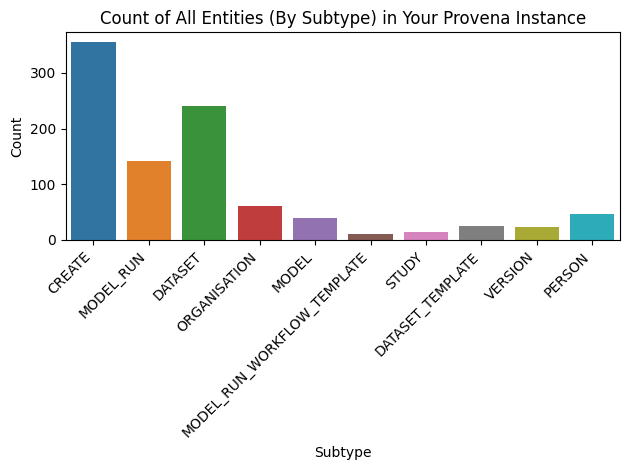

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(x=df.index, y=df["count"], hue = df.index)

ax.set_title("Count of All Entities (By Subtype) in Your Provena Instance")
ax.set_xlabel("Subtype")
ax.set_ylabel("Count")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()